[[12  5  0  0  0  0]
 [ 2 17  0  1  2  0]
 [ 1  3  1  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  1  1  1]
 [ 0  2  0  3  1  7]]
0.6615384615384615


[Text(0, 0, 't1'),
 Text(0, 1, 't2'),
 Text(0, 2, 't3'),
 Text(0, 3, 't5'),
 Text(0, 4, 't6'),
 Text(0, 5, 't7')]

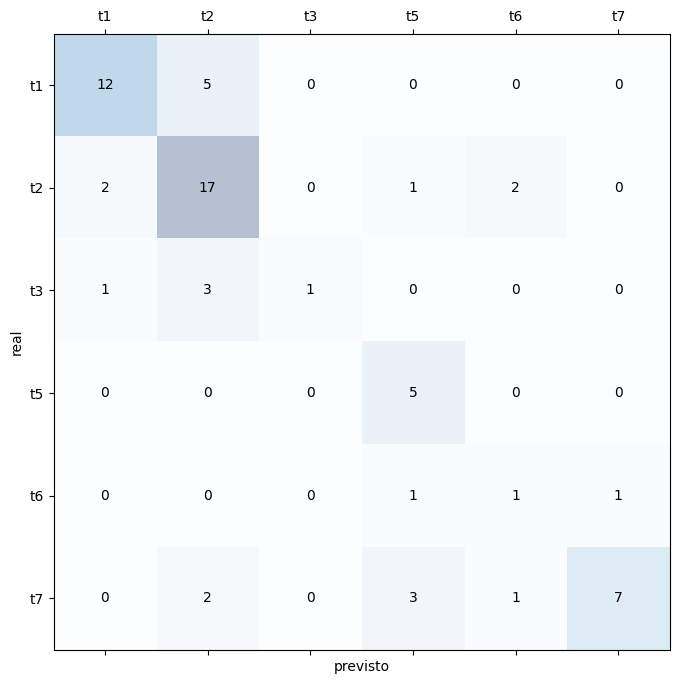

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix as cfm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(url,header=None)


# https://dreampuf.github.io/GraphvizOnline

glass = pd.DataFrame(glass)
glass.columns = ["id","RI","Na","Mg","Al","si","K","ca","Ba","Fe","type"]
glass=glass.drop("id",axis=1)

X = glass
X = X.drop("type",axis=1)
Y = glass["type"]

# Split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=123)

clf = tree.DecisionTreeClassifier(min_samples_leaf = 5, max_depth=5,random_state=123)

clf = clf.fit(xtrain,ytrain)

dot_data = tree.export_graphviz(clf)

dot_data = tree.export_graphviz(clf,out_file="arvore.dot",
class_names=['t1','t2','t3','t5','t6','t7'],
feature_names=["RI","Na","Mg","Al","si","K","ca","Ba","Fe"],
filled=True,rounded=True)

ypred = clf.predict(xtest)
confmat = cfm(y_true=ytest,y_pred=ypred)
print(confmat)

print(clf.score(xtest,ytest))

labels = ['t1','t2','t3','t5','t6','t7']
fig,ax = plt.subplots(figsize=(8,8))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
nlabel = len(confmat)
for i in range (nlabel):
  for j in range (nlabel):
    ax.text(x=j,y=i,s=str(confmat[i][j]),va='center',ha='center')

plt.xlabel('previsto')
plt.ylabel('real')
xaxis = np.arange(len(labels))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
